In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [3]:
data = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx', sheet_name='Data')

In [4]:
data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [5]:
df = data.copy()

In [6]:
from sklearn.preprocessing import StandardScaler

# Convert intervel data to normalized categories using StandardScaler Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']])


scaled_df = pd.DataFrame(scaled_data, columns=['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage'])

# concat scaled columns to df
df = pd.concat([df[['ID', 'ZIP Code', 'Family',
       'Education', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard']], scaled_df], axis=1)

In [7]:
df['Income'] = df['Income']/12

NameError: name 'sns' is not defined

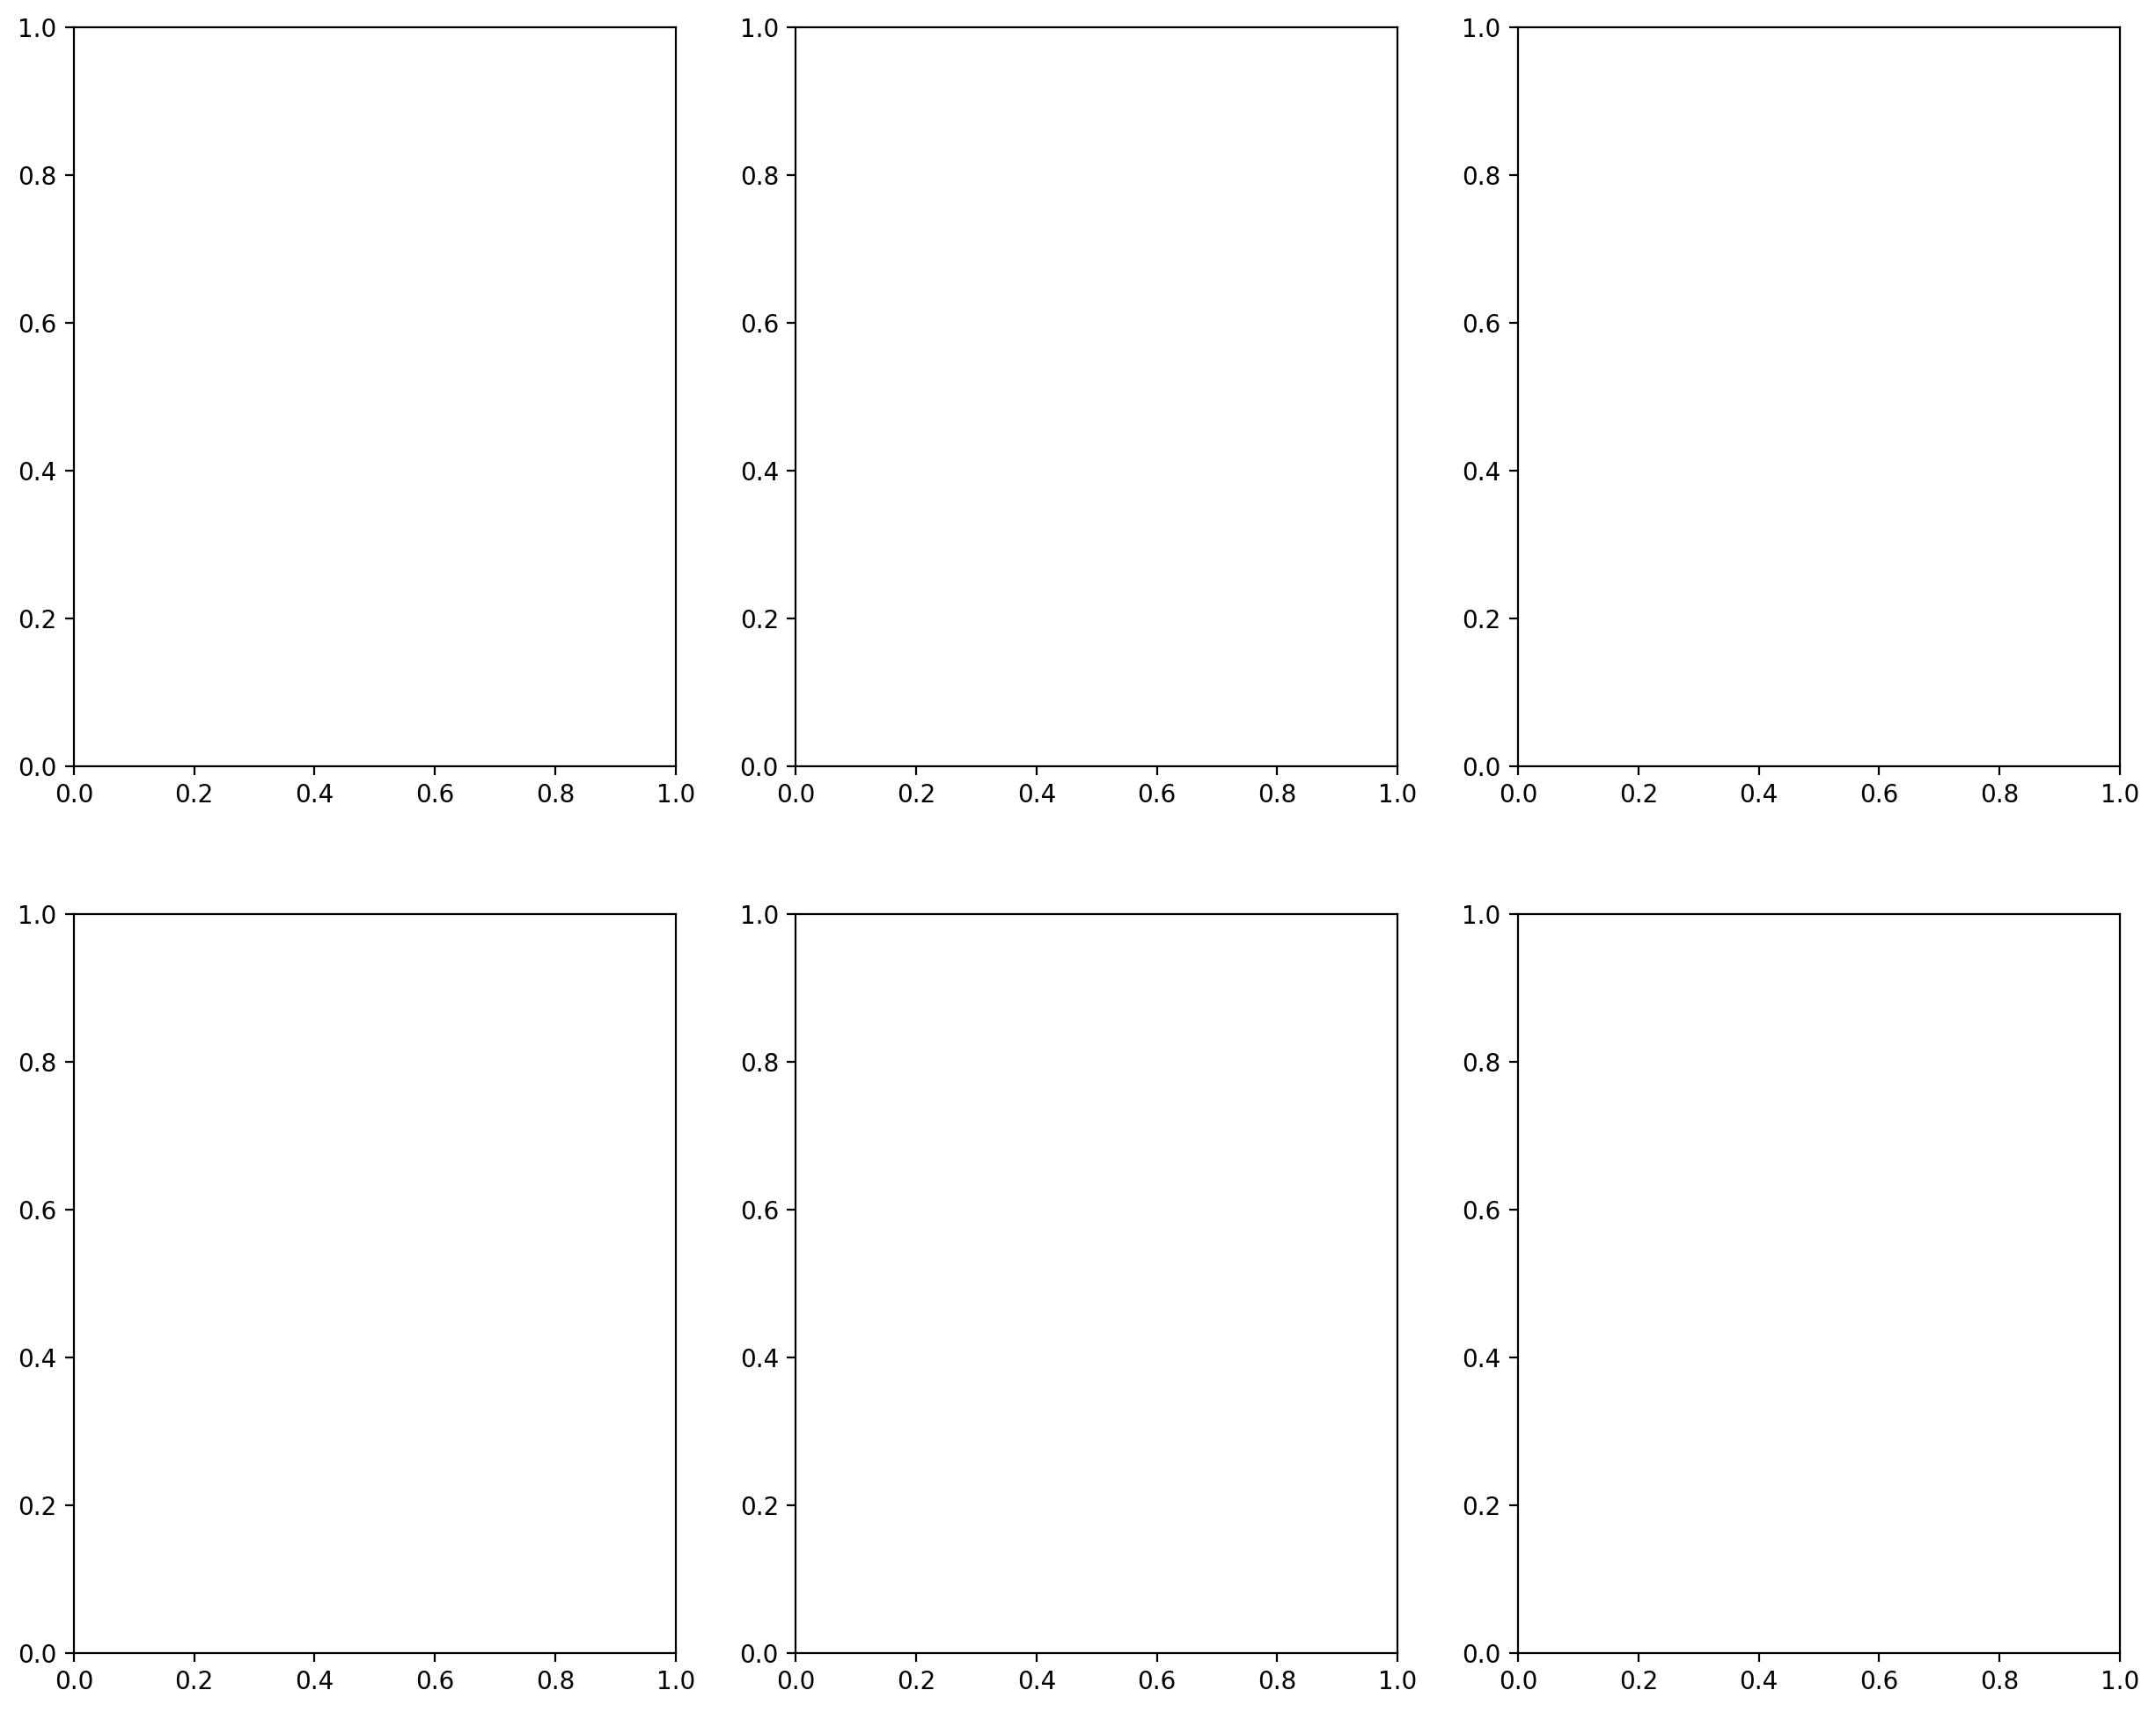

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,12), dpi=200)
cat_Features = ['CD Account','Education','Family','Securities Account','Online','CreditCard']
target = 'Personal Loan'
for ax, col in zip(axes.flatten(), cat_Features):
    sns.countplot(x=col, data=df, hue=target, ax=ax, palette=['royalblue', 'darkturquoise'])
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.legend(title='Personal Loan', loc='upper right', fontsize=8)

fig.suptitle('Categorical Features vs Target Stacked Barplots', fontsize=22)
fig.tight_layout()
plt.show()

In [8]:
X = df.drop(['ID','ZIP Code','Personal Loan',], axis=1)
y = df.loc[:, df.columns == 'Personal Loan']

X_array = X.values
y_array = y.values

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_array, y_array, test_size=0.2, random_state=7)

In [10]:
 # to convert 1 d vector into 1 d array
y_train = np.ravel(y_train)

In [11]:
model = GaussianNB()
model.fit(X_train, y_train)

predictions=model.predict(X_test)

In [12]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       904
           1       0.42      0.65      0.51        96

    accuracy                           0.88      1000
   macro avg       0.69      0.77      0.72      1000
weighted avg       0.91      0.88      0.89      1000



In [13]:
print(confusion_matrix(y_test,predictions))

[[817  87]
 [ 34  62]]


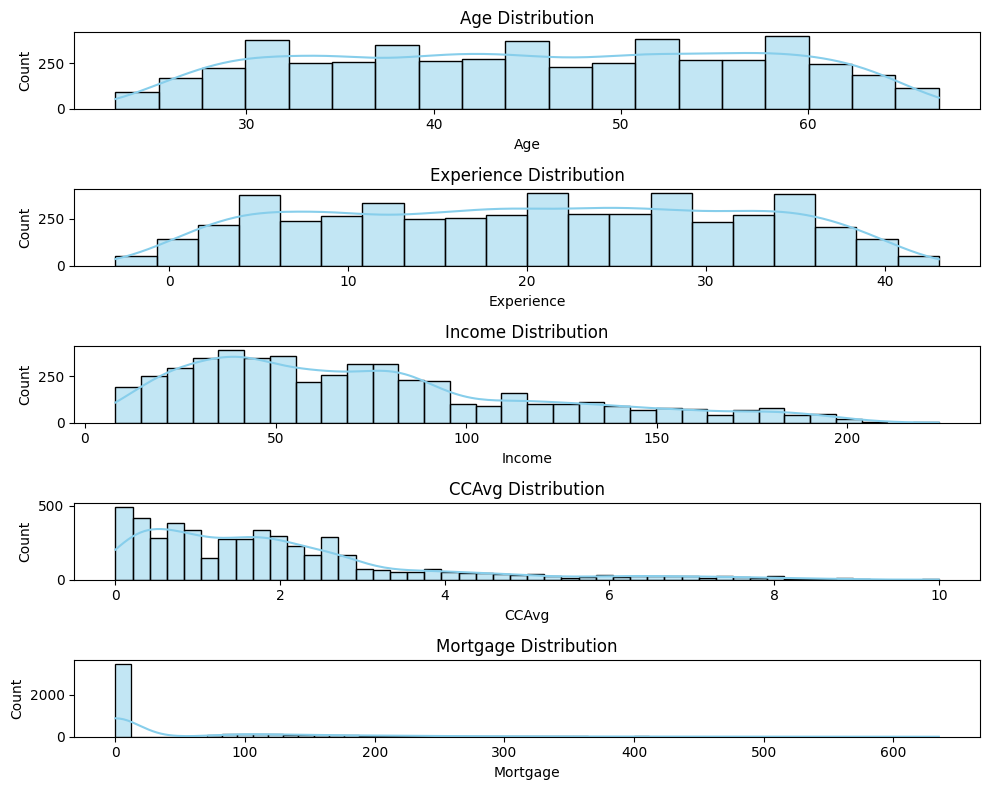

In [37]:
continuous_features = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

fig, axes = plt.subplots(len(continuous_features), 1, figsize=(10, 8))

for i, feature in enumerate(continuous_features):
    sns.histplot(data[feature], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'{feature} Distribution')

plt.tight_layout()
plt.show()

In [14]:
def predict_loan_approval(age, income, experience):
    input_vector = {
        'Age': age,
        'Experience': experience,
        'Income': income,
        'Family': 2,
        'CCAvg': 2,
        'Education': 2,
        'Mortgage': 0,
        'Securities Account': 0,
        'CD Account': 0,
        'Online': 1,
        'CreditCard': 0
    }

    input_df = pd.DataFrame([input_vector])

    prediction = model.predict(input_df)

    if prediction[0] == 1:
        return "The loan is likely to be approved."
    else:
        return "The loan is unlikely to be approved."

result = predict_loan_approval(age=30, income=50, experience=5)
print(result)

The loan is likely to be approved.


C:\Users\Saura\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
